# My Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Wrangling

In [36]:
df=pd.read_excel('D:/sql/Data set/Retail/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preparing

## changing all 0 unit price to the mode price for every category

In [37]:
zero_G=df.loc[(df['UnitPrice']==0)&(df['CustomerID'].notnull()==True),['Description']]

In [38]:
a=list(zero_G['Description'])

In [39]:
for i in a:
    
    description_match = df['Description'] == i
    mode_price = df[description_match]['UnitPrice'].mode().iloc[0]
    df.loc[description_match & (df['UnitPrice'] == 0), 'UnitPrice'] = mode_price

## adding total price column

In [40]:
df['TotalPrice']=df['UnitPrice']*df['Quantity']

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


# Data Cleaning

## Removing non customer & cancelled transactions

In [42]:
df2=df.loc[(df['Quantity']>0)&(df['CustomerID'].notnull()==True)]

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [44]:
pd.DataFrame(df2.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
InvoiceNo,18536
StockCode,3665
Description,3877
Quantity,302
InvoiceDate,17286
UnitPrice,440
CustomerID,4339
Country,37
TotalPrice,2940


## droping unimportant feature

In [45]:
df2.drop(['InvoiceNo','Description'],axis=1,inplace=True)

In [46]:
df2['StockCode'] = df2['StockCode'].astype(str)
df2['Country'] = df2['Country'].astype(str)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    397924 non-null  object        
 1   Quantity     397924 non-null  int64         
 2   InvoiceDate  397924 non-null  datetime64[ns]
 3   UnitPrice    397924 non-null  float64       
 4   CustomerID   397924 non-null  float64       
 5   Country      397924 non-null  object        
 6   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 24.3+ MB


In [48]:
pd.DataFrame(df2.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
StockCode,3665
Quantity,302
InvoiceDate,17286
UnitPrice,440
CustomerID,4339
Country,37
TotalPrice,2940


In [49]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [50]:
today_date = dt.datetime(2011, 12, 9)

In [51]:
df2['InvoiceDate'] = (today_date - df2['InvoiceDate']).dt.days

In [52]:
print(df2.isnull().sum())

StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [53]:
df2.duplicated().sum()

6604

In [54]:
df2.drop_duplicates(inplace = True)

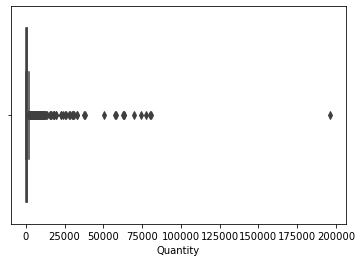

In [60]:
sns.boxplot(customer_data['Quantity'])
plt.show()

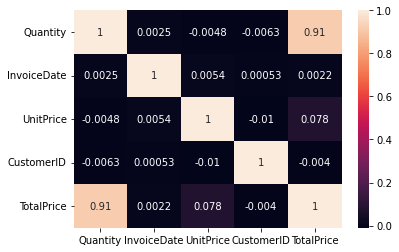

In [22]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## grouping customer data

## removing outliers

In [61]:
Q1 = customer_data.quantile(0.25)
Q3 = customer_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((customer_data < (Q1 - 1.5 * IQR)) | (customer_data > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_data = customer_data[~outliers]

In [62]:
cleaned_data

,InvoiceDate,Quantity,TotalPrice,Country
CustomerID,,,,
12820.0,2,722,942.34,35
12821.0,213,70,92.72,35
12822.0,69,550,948.88,35
12823.0,73,230,1759.50,35
12824.0,58,232,397.12,35
...,...,...,...,...
18280.0,276,45,180.60,35
18281.0,179,54,80.82,35
18282.0,6,103,178.05,35


In [58]:
customer_data = df2.groupby('CustomerID').agg({'InvoiceDate': lambda date: date.min(),
                                    'Quantity': lambda num: num.sum(),
                                    'TotalPrice': lambda num: num.sum(),
                                    'Country': lambda num: num.mode()})                                  
customer_data

,InvoiceDate,Quantity,TotalPrice,Country
CustomerID,,,,
12346.0,324,74215,77183.60,35
12347.0,1,2458,4310.00,16
12348.0,74,2341,1797.24,12
12349.0,17,631,1757.55,18
12350.0,309,197,334.40,24
...,...,...,...,...
18280.0,276,45,180.60,35
18281.0,179,54,80.82,35
18282.0,6,103,178.05,35


In [59]:
print(customer_data.isnull().sum())

InvoiceDate    0
Quantity       0
TotalPrice     0
Country        0
dtype: int64


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'tensorflow.python.distribute.distribution_strategy_context'

In [57]:
label_encoder = LabelEncoder()
df2['StockCode'] = label_encoder.fit_transform(df2['StockCode'])
df2['Country'] = label_encoder.fit_transform(df2['Country'])


In [28]:
X=cleaned_data.drop(['CustomerID'],axis=1)
y=cleaned_data['CustomerID']
X.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,2958,6,372,2.55,35,15.30
1,2412,6,372,3.39,35,20.34
2,2607,8,372,2.75,35,22.00
3,2559,6,372,3.39,35,20.34
4,2558,6,372,3.39,35,20.34


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [33]:
y_train=tf.convert_to_tensor(y_train)
y_test=tf.convert_to_tensor(y_test)
X_train=tf.convert_to_tensor(X_train)
X_test=tf.convert_to_tensor(X_test)

In [30]:
X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)

In [31]:
X_train

,StockCode,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
325728,1867.0,10.0,95.0,1.65,35.0,16.50
192082,1629.0,2.0,206.0,0.65,35.0,1.30
231712,1397.0,12.0,172.0,1.95,35.0,23.40
275358,2793.0,24.0,139.0,1.25,35.0,30.00
404277,2564.0,4.0,51.0,2.95,35.0,11.80
...,...,...,...,...,...,...
118,375.0,1.0,372.0,1.95,35.0,1.95
89124,2854.0,12.0,297.0,1.45,10.0,17.40
472640,2056.0,10.0,22.0,0.79,35.0,7.90
283919,1774.0,2.0,132.0,5.75,35.0,11.50


In [89]:
cleaned_data=cleaned_data.astype(np.float32)

In [53]:
cleaned_data=tf.convert_to_tensor(cleaned_data)

In [67]:
cleaned_data.empty

False

In [32]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(layers.Dense(32,activation='sigmoid',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='sgd', loss='mse')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
7058/7058 [==============================] - 23s 3ms/step - loss: 3009196.0000 - val_loss: 2937822.0000
Epoch 2/20
7058/7058 [==============================] - 22s 3ms/step - loss: 2940564.7500 - val_loss: 2959625.7500
Epoch 3/20
7058/7058 [==============================] - 23s 3ms/step - loss: 2941356.0000 - val_loss: 2924285.5000
Epoch 4/20
7058/7058 [==============================] - 22s 3ms/step - loss: 2941511.0000 - val_loss: 2922954.5000
Epoch 5/20
7058/7058 [==============================] - 22s 3ms/step - loss: 2941256.0000 - val_loss: 3028766.5000
Epoch 6/20
7058/7058 [==============================] - 23s 3ms/step - loss: 2941124.5000 - val_loss: 2923158.0000
Epoch 7/20
7058/7058 [==============================] - 22s 3ms/step - loss: 2942167.7500 - val_loss: 2929801.5000
Epoch 8/20
7058/7058 [==============================] - 22s 3ms/step - loss: 2940972.7500 - val_loss: 2945239.0000
Epoch 9/20
7058/7058 [==============================] - 23s 3ms/step - loss: 294

In [36]:
pred=model.predict(X_test)
pred

3025/3025 [==============================] - 6s 2ms/step


array([[15363.202],
       [15363.202],
       [15363.202],
       ...,
       [15363.202],
       [15363.202],
       [15363.202]], dtype=float32)

In [74]:
from keras.layers import Input, Dense
from keras.models import Model


input_layer = Input(shape=(4,))
encoded = Dense(4, activation='relu')(input_layer)
decoded = Dense(4, activation='sigmoid')(encoded)

autoencoder = Model(input_layer,decoded)
autoencoder.compile(optimizer='sgd', loss='mse')


In [75]:
autoencoder.fit(cleaned_data,cleaned_data, epochs=100, batch_size=256, shuffle=True, validation_split=0.3)

ValueError: Expected input data to be non-empty.

In [76]:
encoder = Model(input_layer, encoded)

In [77]:
compressed_data = encoder.predict(cleaned_data)

106/106 [==============================] - 1s 2ms/step


In [74]:
clusters

array([0, 1, 0, ..., 2, 2, 0])

In [84]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(compressed_data)

In [85]:
cleaned_data['Segment'] = clusters

for cluster in np.unique(clusters):
    print(f"Cluster {cluster}:")
    print(cleaned_data[cleaned_data['Segment'] == cluster].describe())

Cluster 0:
       InvoiceDate     Quantity   TotalPrice  Country  Segment
count  2140.000000  2140.000000  2140.000000   2140.0   2140.0
mean    110.884579   227.463551   370.684712     35.0      0.0
std      95.615055   180.669709   210.106610      0.0      0.0
min      -1.000000     1.000000     3.750000     35.0      0.0
25%      29.000000   102.000000   193.292500     35.0      0.0
50%      73.000000   185.500000   332.650000     35.0      0.0
75%     185.000000   306.250000   534.972500     35.0      0.0
max     325.000000  2019.000000   901.200000     35.0      0.0
Cluster 1:
       InvoiceDate     Quantity   TotalPrice  Country  Segment
count   854.000000   854.000000   854.000000    854.0    854.0
mean     55.189696   769.745902  1279.393478     35.0      1.0
std      61.963432   333.698606   322.752448      0.0      0.0
min      -1.000000     1.000000   676.200000     35.0      1.0
25%      13.000000   524.250000  1007.332500     35.0      1.0
50%      31.000000   721.500000  

In [104]:
cleaned_data['Segment'] = clusters

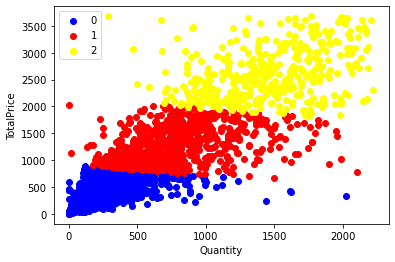

In [86]:
segment1 = cleaned_data[cleaned_data['Segment'] == 0]
segment2 = cleaned_data[cleaned_data['Segment'] == 1]
segment3 = cleaned_data[cleaned_data['Segment'] == 2]
# segment4 = cleaned_data[cleaned_data['Segment'] == 3]
plt.scatter(x=segment1['Quantity'], y=segment1['TotalPrice'], label=0, color='blue')
plt.scatter(x=segment2['Quantity'], y=segment2['TotalPrice'], label=1, color='red')
plt.scatter(x=segment3['Quantity'], y=segment3['TotalPrice'], label=2, color='yellow')
# plt.scatter(x=segment4['Quantity'], y=segment4['TotalPrice'], label=3, color='green')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.legend()

plt.show()

In [87]:
customer_seg = cleaned_data[['Segment','InvoiceDate','Quantity','TotalPrice']].groupby('Segment').agg(['count','mean','max','sum'])
customer_seg

InvoiceDate                          Quantity                     \
              count        mean  max     sum    count         mean   max   
Segment                                                                    
0              2140  110.884579  325  237293     2140   227.463551  2019   
1               854   55.189696  315   47132      854   769.745902  2100   
2               392   36.301020  305   14230      392  1443.117347  2221   

                TotalPrice                                     
            sum      count         mean      max          sum  
Segment                                                        
0        486772       2140   370.684712   901.20   793265.283  
1        657363        854  1279.393478  2033.10  1092602.030  
2        565702        392  2603.679161  3677.02  1020642.231

In [97]:
cleaned_data[cleaned_data['Segment'] == cluster].describe()

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Segment
count,95876.000000,95876.000000,95876.000000,95876.000000,95876.000000,95876.000000,95876.000000,95876.0
mean,1255.515137,6.732936,145.077179,2.142169,16210.892578,34.468941,10.474995,3.0
std,609.281433,6.483458,112.583176,1.500208,1231.551758,3.585658,8.562971,0.0
min,0.000000,1.000000,-1.000000,0.060000,12658.000000,0.000000,0.060000,3.0
25%,813.000000,2.000000,44.000000,1.250000,15241.000000,35.000000,3.320000,3.0
50%,1328.000000,4.000000,119.000000,1.650000,16362.000000,35.000000,8.400000,3.0
75%,1701.000000,10.000000,239.000000,2.950000,17228.000000,35.000000,15.300000,3.0
max,3022.000000,27.000000,372.000000,7.500000,18287.000000,36.000000,42.000000,3.0


In [81]:
cleaned_data

,InvoiceDate,Quantity,TotalPrice,Country,Segment
CustomerID,,,,,
12820.0,2,722,942.34,35,0
12821.0,213,70,92.72,35,2
12822.0,69,550,948.88,35,0
12823.0,73,230,1759.50,35,3
12824.0,58,232,397.12,35,2
...,...,...,...,...,...
18280.0,276,45,180.60,35,2
18281.0,179,54,80.82,35,2
18282.0,6,103,178.05,35,2


# Customer Segmentation by PCA & KMeans

## evaluating models

# EDA after Segmentation

# Conclusions
## segment 1 are 60% of all customers & 24% of all quantity & 25% of all profits
## segment 0 are 27% of all customers & 38% of all quantity & 36% of all profits
## segment 2 are 13% of all customers & 36% of all quantity & 37% of all profits
